## **Goal-** Implementing a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load dataset
data = pd.read_csv("train.csv")
data.shape

(1460, 81)

In [ ]:
# Extracting the given features
features = ["GrLivArea", "BedroomAbvGr", "FullBath"]
target = "SalePrice"

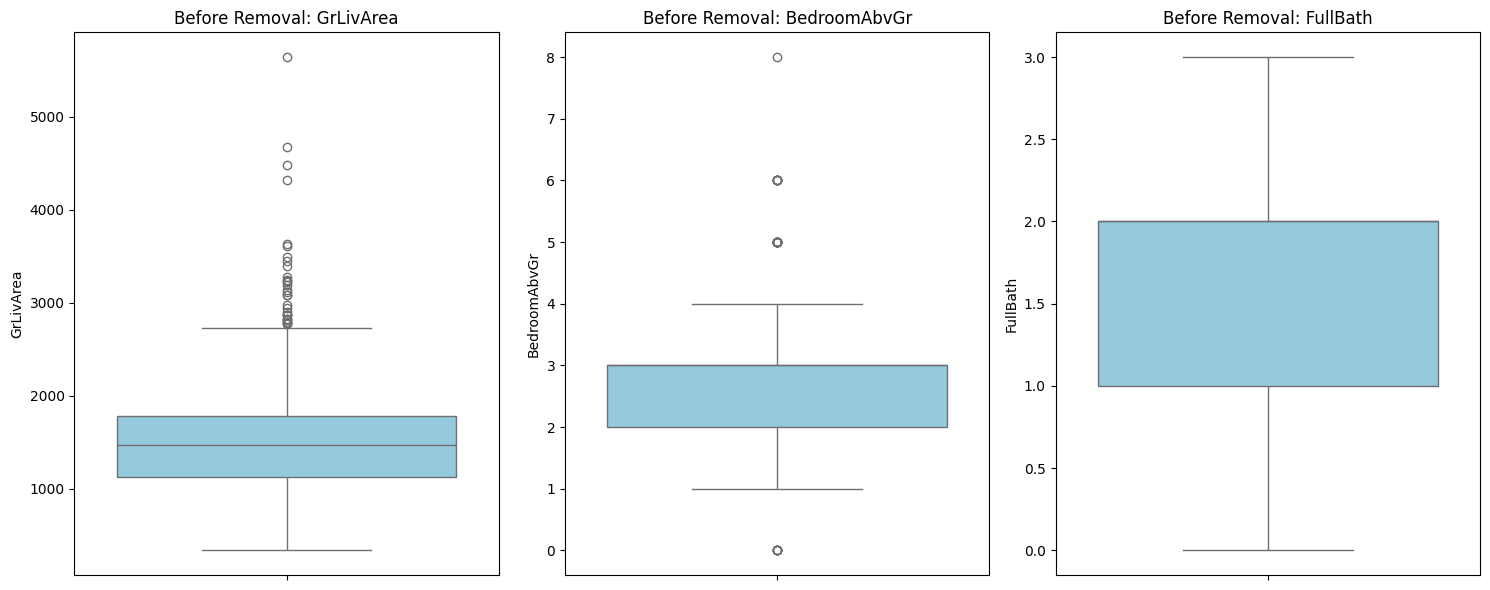

In [ ]:
# Looking for outliers
plt.figure(figsize=(15, 6))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=data[feature], color="skyblue")
    plt.title(f"Before Removal: {feature}")
plt.tight_layout()
plt.show()

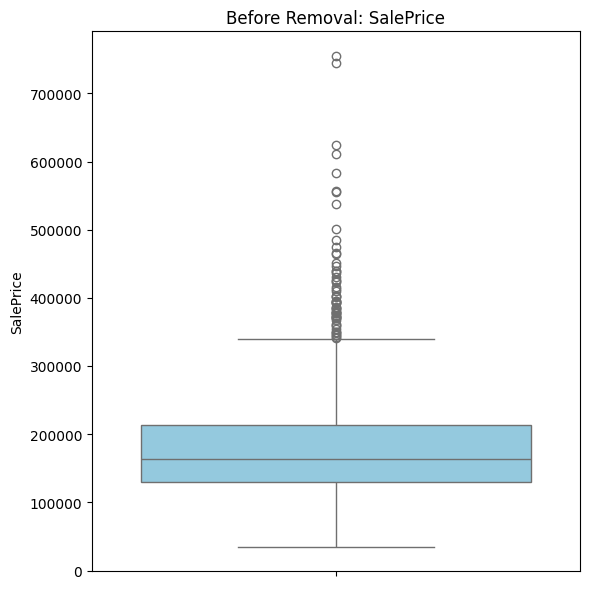

In [ ]:
# Same for target
plt.figure(figsize=(6, 6))
sns.boxplot(y=data[target], color="skyblue")
plt.title(f"Before Removal: {target}")
plt.tight_layout()
plt.show()

In [ ]:
data = data.drop(data[(data["GrLivArea"] > 4000) & (data["SalePrice"] > 500000)].index)

In [ ]:
X = data[features]
y = data[target]

In [ ]:
X.isnull().sum()

,0
GrLivArea,0
BedroomAbvGr,0
FullBath,0


In [ ]:
y.isnull().sum()

np.int64(0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling (important for regularized models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Predict
y_pred = lr.predict(X_test_scaled)

In [ ]:
# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Linear Regression Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

Linear Regression Performance:
RMSE: 47507.42
R² Score: 0.584


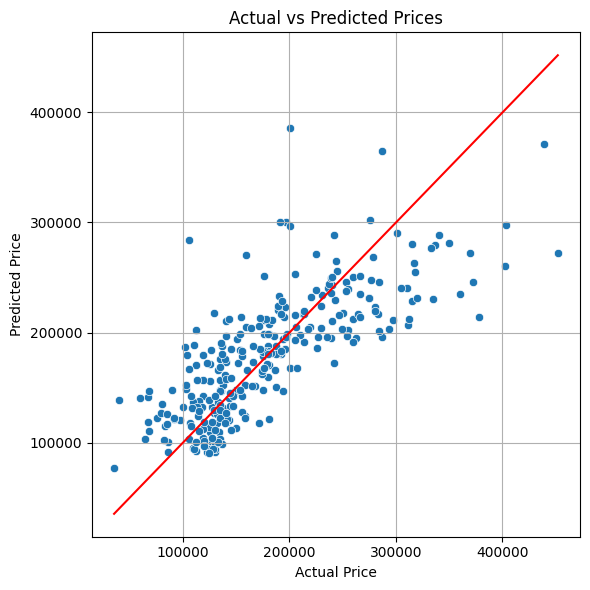

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.grid(True)
plt.tight_layout()
plt.show()

Note - The result of this model can be better but according to the problem we need to take specific features only.